# 🌳 Decision Tree Classifier – Bank Marketing Dataset

In [26]:
# 📌 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import zipfile

### 📥 Extract the dataset

In [27]:
with zipfile.ZipFile("bank-additional.zip", 'r') as zip_ref:
    zip_ref.extractall("bank_additional_data")

### ⬇️Load dataset (semicolon-separated)

In [28]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=";")

### ✔️Quick check

In [29]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.

### 🎯 Target variable

In [30]:
target = "y"

## 🧹 Data preprocessing

### 👾Convert target variable to binary (yes=1, no=0)

In [31]:
df[target] = df[target].map({"yes": 1, "no": 0})

### Encode categorical variables

In [32]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### 📊 Features & Target split

In [33]:
X = df.drop(columns=[target])
y = df[target]

### 🔀 Train-test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🤖 Model training

In [44]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

### 📈 Predictions

In [36]:
y_pred = clf.predict(X_test)

### 📊 Evaluation

In [37]:
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9146637533381888

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.66      0.51      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



### Confusion Matrix

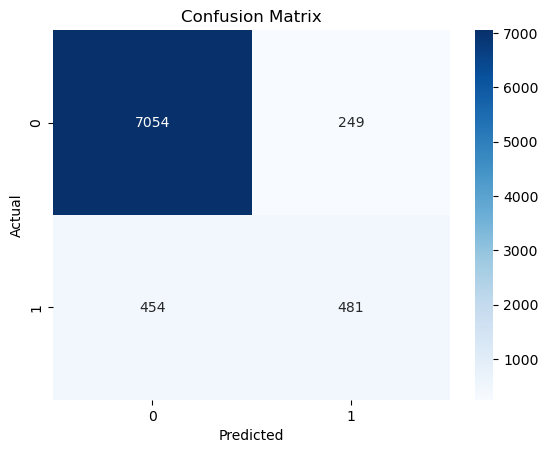

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

### 🌳 Visualizing the Decision Tree

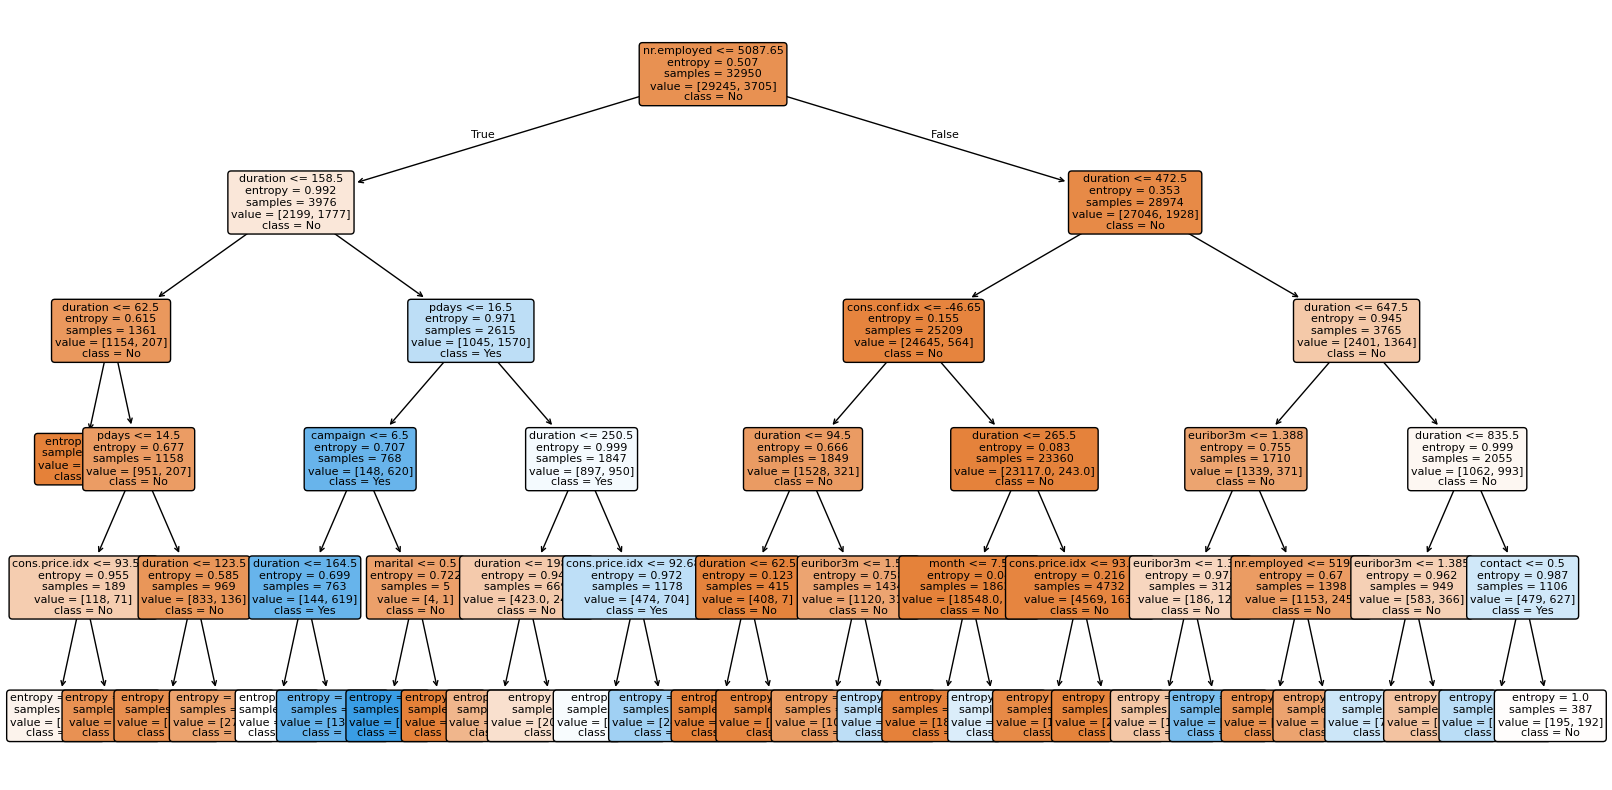

In [46]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=8)
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight")
plt.show()

### 🔍 Feature Importance

In [41]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nFeature Importance:\n", feat_imp)


Feature Importance:
            Feature  Importance
18     nr.employed    0.652346
16   cons.conf.idx    0.101232
11           pdays    0.082382
8            month    0.046614
7          contact    0.036104
17       euribor3m    0.024455
9      day_of_week    0.023627
0              age    0.011979
15  cons.price.idx    0.010322
13        poutcome    0.007564
3        education    0.001359
10        campaign    0.001298
5          housing    0.000718
6             loan    0.000000
1              job    0.000000
4          default    0.000000
12        previous    0.000000
14    emp.var.rate    0.000000
2          marital    0.000000


## 📌 Save the trained model (optional)

In [43]:
import joblib
joblib.dump(clf, "decision_tree_bank.pkl")
print("✅ Model saved as decision_tree_bank.pkl")

✅ Model saved as decision_tree_bank.pkl
